<a href="https://colab.research.google.com/github/Naveensadanandan/Pytorch/blob/main/04_Custom_datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [6]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


### setting up train and test directories path

---



In [8]:
train_path = image_path / "train"
test_path = image_path / "test"

train_path, test_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# Visulaizing random images using PIL

steak
random image height : 512
random image width : 512


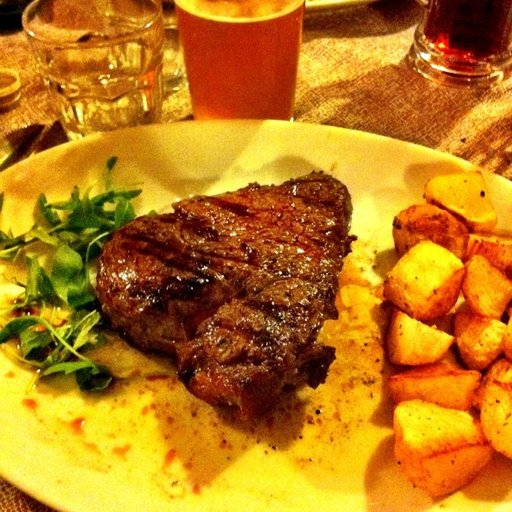

In [9]:
import random
from PIL import Image

image_paths = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_paths)

random_image_label = random_image_path.parent.stem

img = Image.open(random_image_path)

print(random_image_label)
print(f"random image height : {img.height}")
print(f"random image width : {img.width}")
img

# Visulazing random images using matplotlib

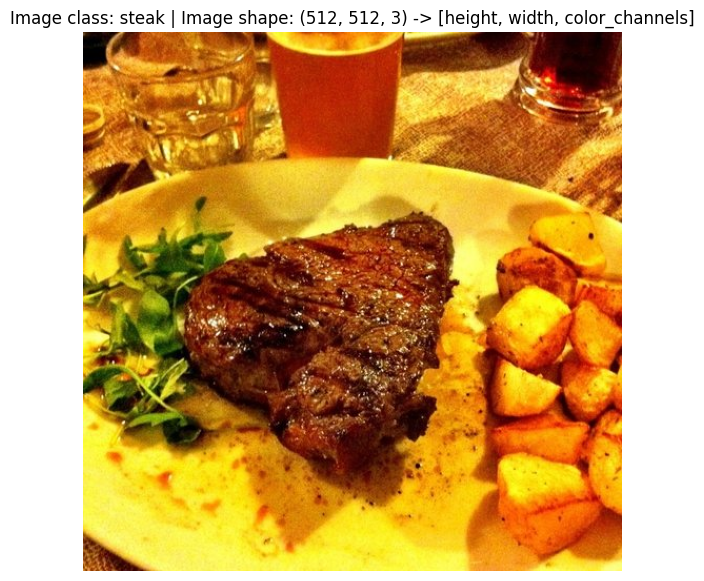

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_label} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

# Transfroming data using torch.utils.data transforms

In [11]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets, transforms

In [12]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [13]:
np.asarray(img).shape

(512, 512, 3)

In [14]:
data_transform(img).shape

torch.Size([3, 64, 64])

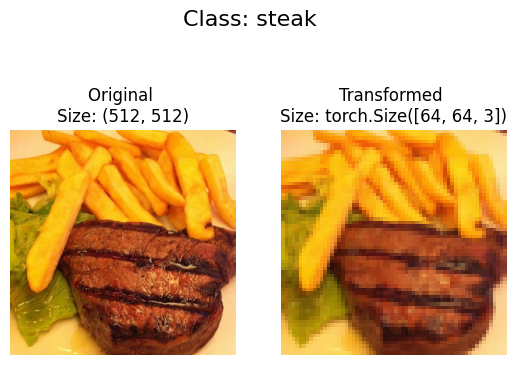

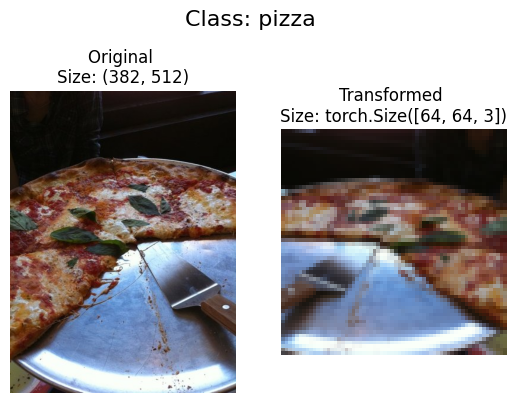

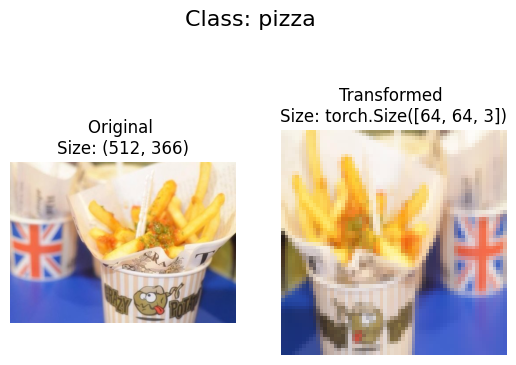

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths,
                        transform=data_transform,
                        n=3)

# Using ImageFolder for creating datasets that can be used for model

In [16]:
train_data = datasets.ImageFolder(root = train_path,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_path,
                                 transform = data_transform)
print(f"train data : \n{train_data}\ntest_data\n{test_data}")

train data : 
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test_data
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [17]:
classes = train_data.classes
classes

['pizza', 'steak', 'sushi']

In [18]:
classes_dict = train_data.class_to_idx
classes_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

# Creating dataloaders

In [19]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 1,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = 1,
                              shuffle = False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f72c5443f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7f72c54438e0>)

In [20]:
img, label = next(iter(train_dataloader))

print(f"shape of image : {img.shape}")
print(f"label of the image : {label}")

shape of image : torch.Size([1, 3, 64, 64])
label of the image : tensor([0])


# creating a model 0 with out data augmentation

In [21]:
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [22]:
#loading and transforming data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_path, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_path, transform = simple_transform)

from torch.utils.data import dataloader
import os

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(dataset=train_data_simple,batch_size=BATCH_SIZE, shuffle = True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE, shuffle = False, num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7f72c5443d60>,
 <torch.utils.data.dataloader.DataLoader at 0x7f72c561a650>)

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [24]:
from torch import nn
class FoodFinder(nn.Module):
  def __init__(self,input_size:int, hidden:int, output_size:int, *args, **kwargs) -> None:
     super().__init__(*args, **kwargs)
     self.conv_layer1 = nn.Sequential(
         nn.Conv2d(in_channels=input_size,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,stride=2)
         )
     self.conv_layer2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden,out_channels=hidden,kernel_size=3,padding=1,stride=1),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2)
         )
     self.linear_layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=hidden*16*16,
                      out_features=output_size)
     )

  def forward(self, x:torch.tensor):
    # x = self.conv_layer1(x)
    # print(x.shape)
    # x = self.conv_layer2(x)
    # print(x.shape)
    # x = self.linear_layer(x)
    # print(x.shape)
    # return x
    return self.linear_layer(self.conv_layer2(self.conv_layer1(x)))

torch.manual_seed(42)
model_0 = FoodFinder(input_size = 3,
                     hidden = 10,
                     output_size = len(train_data.classes)).to(device)
model_0

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [25]:
torch.manual_seed(42)
images = torch.randn(size = (32,3,64,64))
img = images[0]
img.shape

torch.Size([3, 64, 64])

In [26]:
model_0(images.to(device))

tensor([[0.1211, 0.1137, 0.0742],
        [0.1241, 0.1083, 0.0731],
        [0.1146, 0.1000, 0.0643],
        [0.1220, 0.1012, 0.0690],
        [0.1156, 0.1037, 0.0642],
        [0.1155, 0.1188, 0.0781],
        [0.1188, 0.1147, 0.0770],
        [0.1194, 0.1018, 0.0598],
        [0.1168, 0.0971, 0.0796],
        [0.1212, 0.1094, 0.0648],
        [0.1070, 0.1099, 0.0654],
        [0.1275, 0.1064, 0.0759],
        [0.1173, 0.1028, 0.0574],
        [0.1160, 0.0982, 0.0778],
        [0.1184, 0.1013, 0.0731],
        [0.1193, 0.1048, 0.0764],
        [0.1140, 0.1086, 0.0716],
        [0.1289, 0.1047, 0.0844],
        [0.1236, 0.1058, 0.0662],
        [0.1183, 0.0950, 0.0748],
        [0.1053, 0.1112, 0.0749],
        [0.1313, 0.1074, 0.0643],
        [0.1254, 0.1043, 0.0740],
        [0.1336, 0.1008, 0.0789],
        [0.1260, 0.1094, 0.0707],
        [0.1153, 0.1132, 0.0722],
        [0.1082, 0.1144, 0.0717],
        [0.1002, 0.1029, 0.0748],
        [0.1132, 0.1106, 0.0818],
        [0.112

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

In [28]:
img, label = next(iter(train_dataloader_simple))
img = img.to(device)
label = label.to(device)
img.shape,label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [29]:
#checking loss function
y_pred = model_0(img)
y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
loss = loss_fn(y_pred,label)
loss.item()

1.1004326343536377

In [30]:
# checking accuracy function
accuracy = (y_pred_class == label).sum().item()/len(label)
accuracy

0.3125

In [31]:
#Creating a training and testing function
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0 , 0

  for batch , (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    #Forward pass
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


def test_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module):
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch , (X,y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)\

      test_pred = model_0(X)

      loss = loss_fn(test_pred,y)

      test_loss += loss.item()

      test_pred_class = torch.argmax(test_pred, dim=1)

      test_acc += (test_pred_class == y).sum().item()/len(test_pred)
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [32]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [33]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = FoodFinder(input_size=3, # number of color channels (3 for RGB)
                  hidden=10,
                  output_size=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1342 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0989 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 4.808 seconds


In [34]:
def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

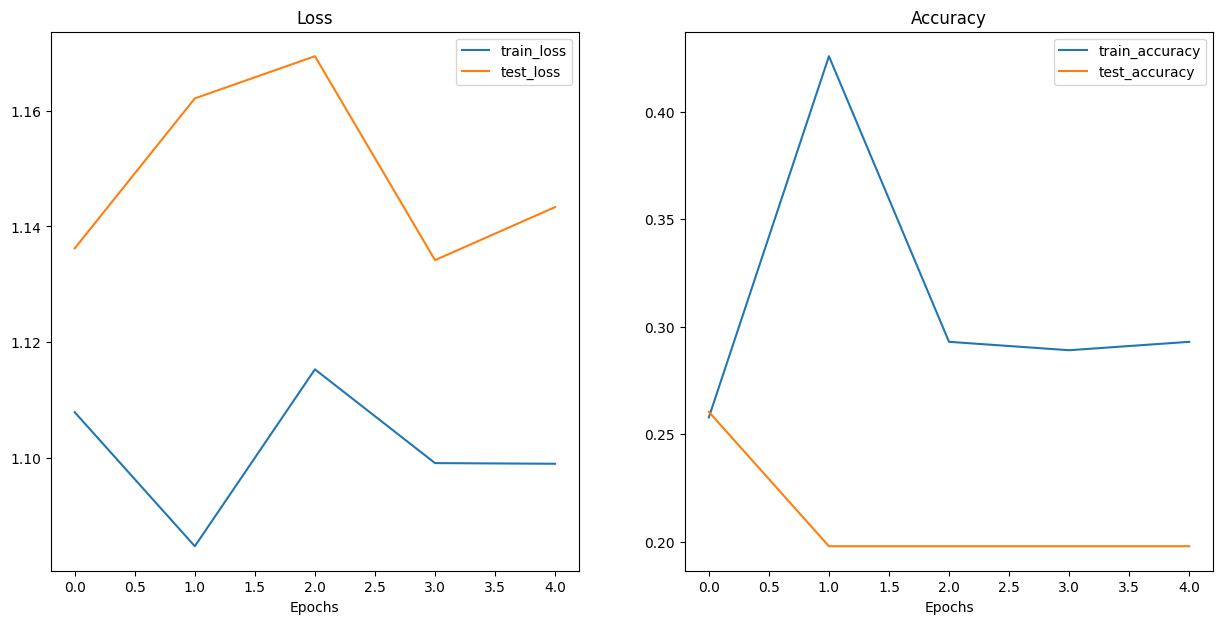

In [35]:
plot_loss_curves(model_0_results)

# model_1 with data Augmentation

In [36]:
#creating train and test transforms
train_transform_aug = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [37]:
# Turning image folders into datasets
train_data_aug = datasets.ImageFolder(
    root = train_path,
    transform=train_transform_aug,
    )
test_data = datasets.ImageFolder(
    root = test_path,
    transform=test_transform_simple
)
train_data_aug,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [38]:
#creating train and test dataloaders
import os
NUM_OF_WORKERS = os.cpu_count()
BATCH_SIZE = 32

train_dataloader_aug = DataLoader(
    dataset = train_data_aug,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=True
)
test_dataloader_simple = DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_OF_WORKERS,
    shuffle=False
)

In [39]:
torch.manual_seed(42)
model_1 = FoodFinder(
    input_size=3,
    hidden = 20,
    output_size=len(train_data_aug.classes)).to(device)
model_1

FoodFinder(
  (conv_layer1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [40]:
#training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 40
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_aug,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/40 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1045 | train_acc: 0.2500 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 2 | train_loss: 1.0962 | train_acc: 0.3945 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0813 | train_acc: 0.4258 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.1117 | train_acc: 0.3047 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0686 | train_acc: 0.4648 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0794 | train_acc: 0.3711 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.0114 | train_acc: 0.5078 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 8 | train_loss: 0.9930 | train_acc: 0.5508 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0564 | train_acc: 0.4336 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0240 | train_acc: 0.4062 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 11 | train_loss: 0.9927 | train_acc: 0.5430 | test_loss: 1.1434 | test_acc: 0.1979
Epoch: 12 | train_l

In [69]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

data/04-pizza-dad.jpeg already exists, skipping download.


In [47]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
class_names = train_data.classes

In [43]:
import torchvision
def pred_plot(model:torch.nn.Module,
              image_path:str,
              class_names:list[str],
              transform=None,
              device=device):
  target_image = torchvision.io.read_image(str(image_path))

  target_image = target_image/255

  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target = target_image.unsqueeze(dim=0)
    y_pred = model(target.to(device))

  y_probs = torch.softmax(y_pred,dim=1)
  y_label = torch.argmax(y_probs,dim=1)
  plt.imshow(target_image.permute(1,2,0))
  if class_names:
    title = f"prediction : {class_names[y_label.cpu()]} | probability : {y_probs.max().cpu():.3f}"
  else:
      title = f"Pred: {y_label.item()} | Prob: {y_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False);


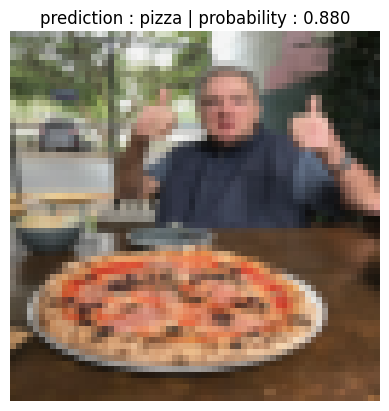

In [70]:
pred_plot(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)